<a href="https://colab.research.google.com/github/harithagb/timeseries/blob/main/econ_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
!pip install statsmodels

import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [141]:
!pip install openpyxl


# Energy Consumption

In [142]:
energy = pd.read_excel('CombustibleFuelsConsumption.xlsx', sheet_name = 'Monthly Data')

In [143]:
energy.rename(columns = {'Coal Consumption for Electricity Generation and Useful Thermal Output, All Sectors':'Coal',
                         'Distillate Fuel Oil Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'DistillateOil',
                         'Residual Fuel Oil Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'ResidualOil',
                         'Other Petroleum Liquids Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherPetroleumLiq',
                         'Petroleum Coke Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'PetroleumCoke',
                         'Total Petroleum Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'TotalPetrolConsumption',
                         'Natural Gas Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'NatGasConsumption',
                         'Other Gases Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherGasConsumption',
                         'Wood Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'WoodConsumption',
                         'Waste Ccoalonsumption for Electricity Generation and Useful Thermal Output, All Sectors': 'WasteConsumption',
                         'Other Consumption for Electricity Generation and Useful Thermal Output, All Sectors': 'OtherConsumption'}, inplace = True)

In [144]:
energycols = energy.columns

In [145]:
energydict = {}
for x in energycols:
  if x not in energydict.keys() and x not in ['Month']:
    energydict[x] = energy[['Month',x]]

<ipython-input-146-f2f7eb3cf987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydict[x].replace('Not Available', np.nan, inplace = True)
<ipython-input-146-f2f7eb3cf987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydict[x].dropna(inplace = True)


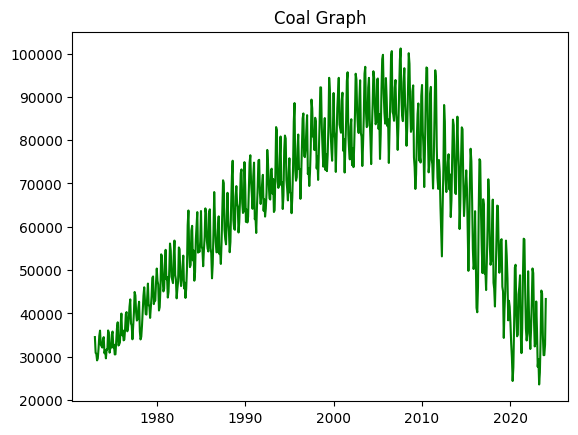

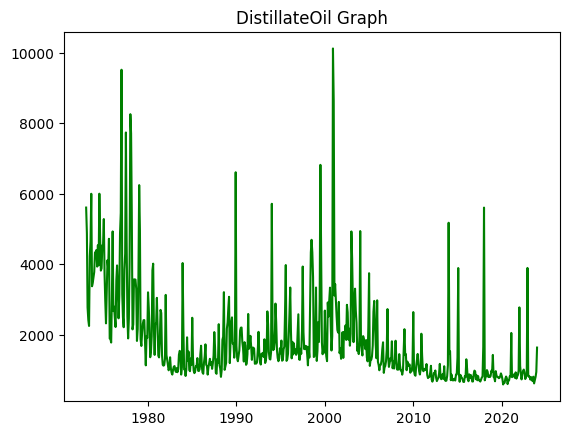

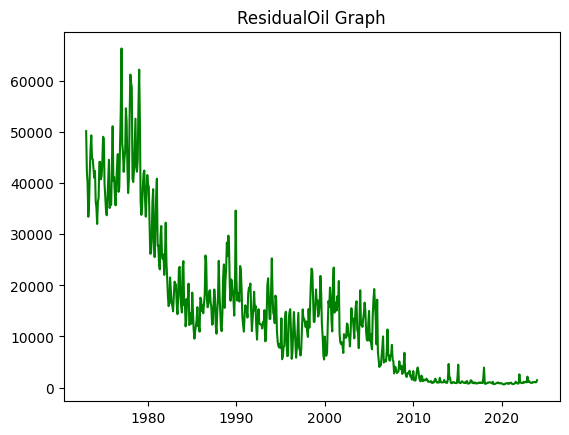

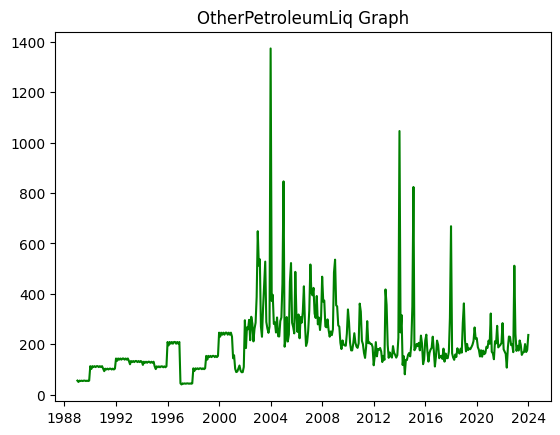

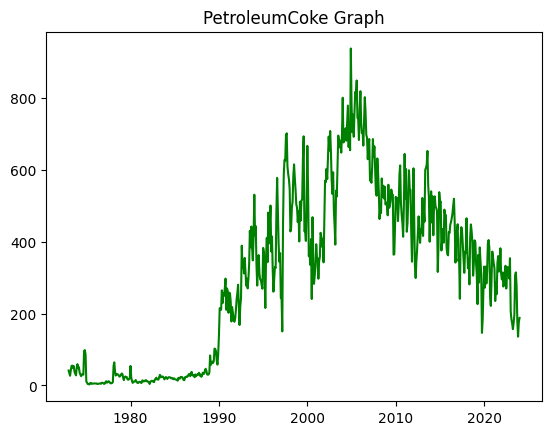

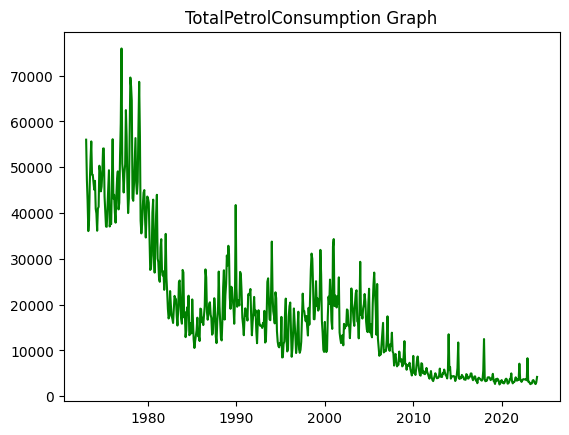

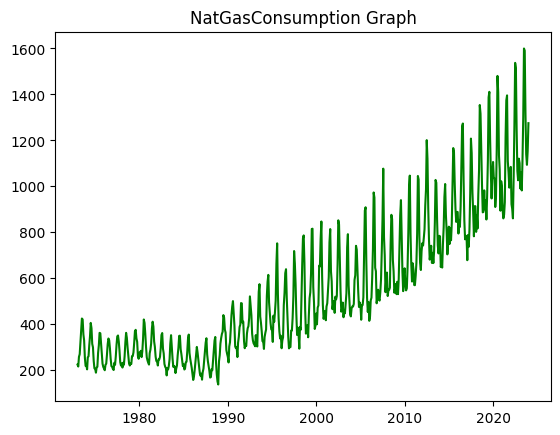

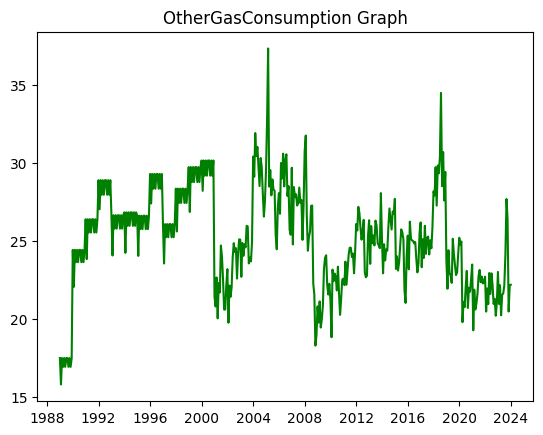

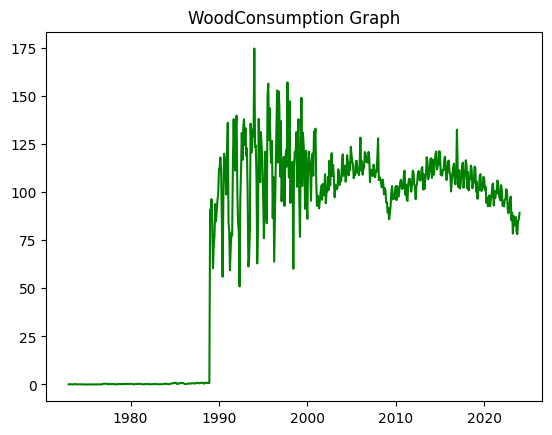

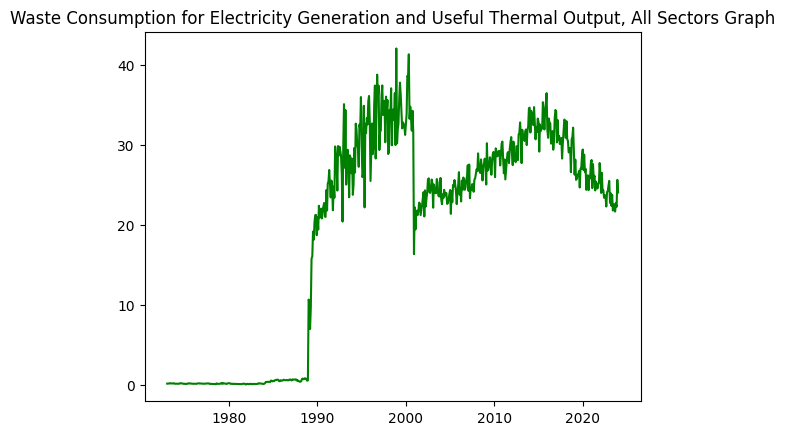

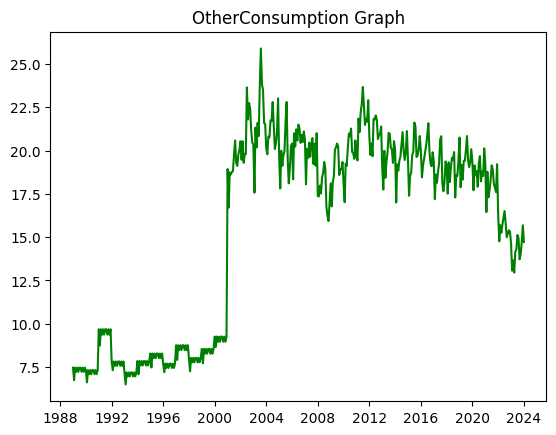

In [146]:
for x in energydict.keys():
  energydict[x].replace('Not Available', np.nan, inplace = True)
  energydict[x].dropna(inplace = True)

  # plotting code
  plt.plot(energydict[x]['Month'], energydict[x][x], color = 'green')
  plt.title(x + " Graph")
  plt.show()

Good options for analyses seem to be coal and Natural Gas consumption.

In [147]:
coal = energydict['Coal']
natgas = energydict['NatGasConsumption']

# Trying the other dataset: prices


In [148]:
prices = pd.read_excel('PricesofElectricityToConsumers.xlsx', sheet_name = 'Monthly Data')

In [149]:
prices.columns

Index(['Month', 'Average Price of Electricity to Ultimate Customers, Residential'], dtype='object')

In [150]:
prices.rename(columns = {'Average Price of Electricity to Ultimate Customers, Residential': 'Residential',
       'Average Price of Electricity to Ultimate Customers, Commercial': 'Commercial',
       'Average Price of Electricity to Ultimate Customers, Industrial': 'Industrial',
       'Average Price of Electricity to Ultimate Customers, Transportation': 'Transportation',
       'Average Price of Electricity to Ultimate Customers, Other': 'Other',
       'Average Price of Electricity to Ultimate Customers, Total': 'Total'}, inplace = True)

In [151]:
pricedict = {}
for x in prices.columns:
  if x not in pricedict.keys() and x not in ['Month']:
    pricedict[x] = prices[['Month',x]]

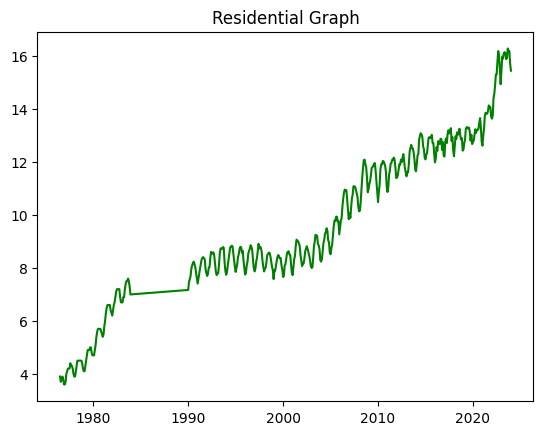

In [152]:
for x in pricedict.keys():
  pricedict[x].replace('Not Available', np.nan, inplace = True)
  pricedict[x].replace('Not Applicable', np.nan, inplace = True)
  pricedict[x].dropna(inplace = True)

  # plotting code
  plt.plot(pricedict[x]['Month'], pricedict[x][x], color = 'green')
  plt.title(x + " Graph")
  plt.show()

In [153]:
electricity = pricedict['Residential']

In [154]:
# functions
def decomposition(x, label):
  import statsmodels.api as sm
  # Example: Assuming 'data' is your time series data
  data = x # replace 'your_data' with your actual data
  decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)  # adjust the period based on your data

  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid

  plt.figure(figsize=(12, 8))
  plt.suptitle(label)
  plt.subplot(411)
  plt.plot(data, label = 'Original', color = 'green')
  plt.legend(loc='best')
  plt.subplot(412)
  plt.plot(trend, label = 'Trend', color = 'black')
  plt.legend(loc = 'best')
  plt.subplot(413)
  plt.plot(seasonal,label = 'Seasonality', color = 'blue')
  plt.legend(loc = 'best')
  plt.subplot(414)
  plt.plot(residual, label='Residuals', color = 'red')
  plt.legend(loc = 'best')
  plt.tight_layout()

  trend_filled = trend.fillna(method='ffill').fillna(method='bfill')
  seasonal_filled = seasonal.fillna(method='ffill').fillna(method='bfill')
  resid_filled = residual.fillna(method='ffill').fillna(method='bfill')


  return trend_filled, seasonal_filled, resid_filled

# Decomposition
In this section we try decomposition of the input signal into trend, sesonality and residuals. We then examine the residuals for goodness of fit.

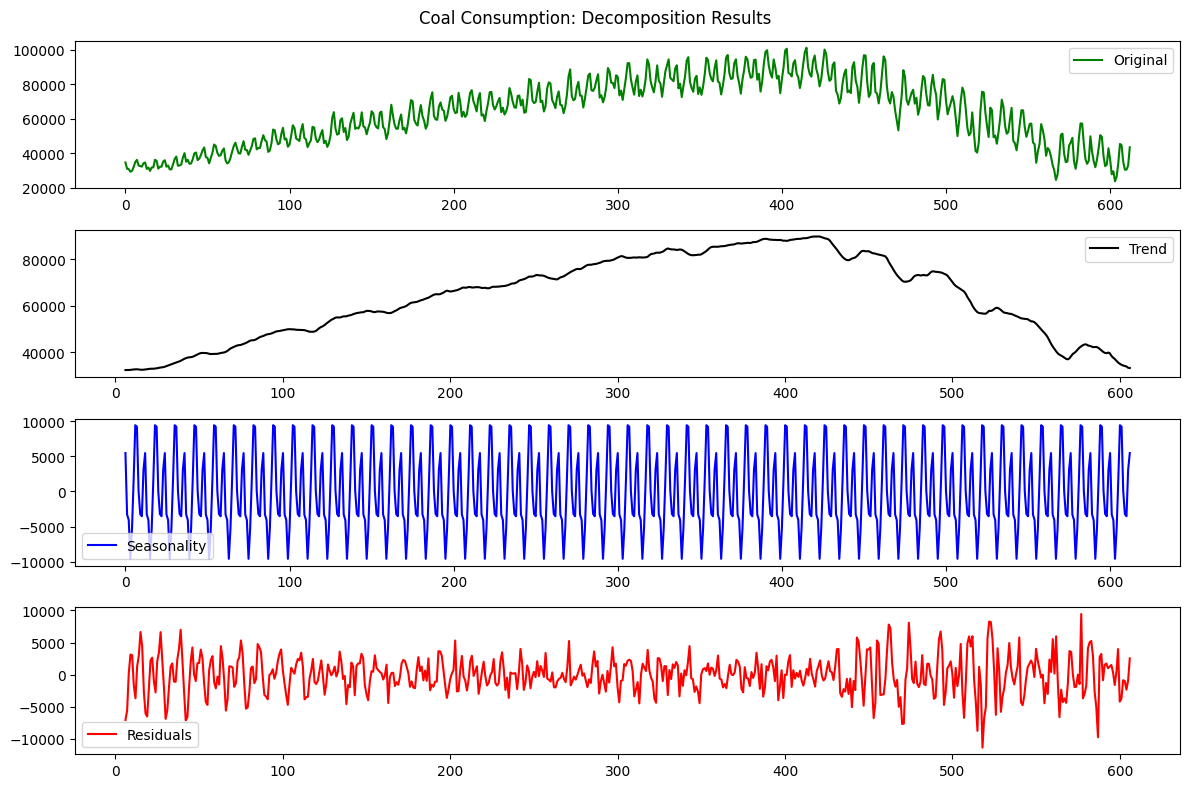

In [155]:
ct, cs, cr = decomposition(coal['Coal'], 'Coal Consumption: Decomposition Results')

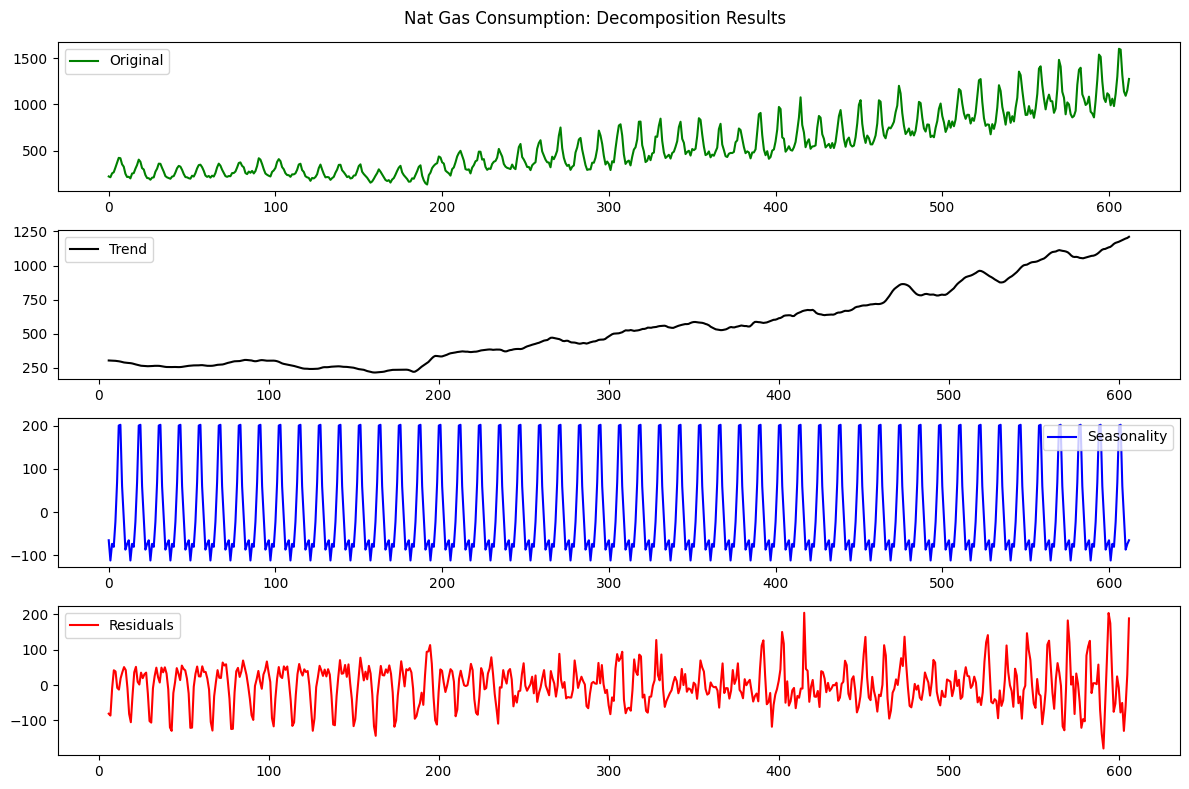

In [156]:
nt, ns, nr = decomposition(natgas['NatGasConsumption'], 'Nat Gas Consumption: Decomposition Results')

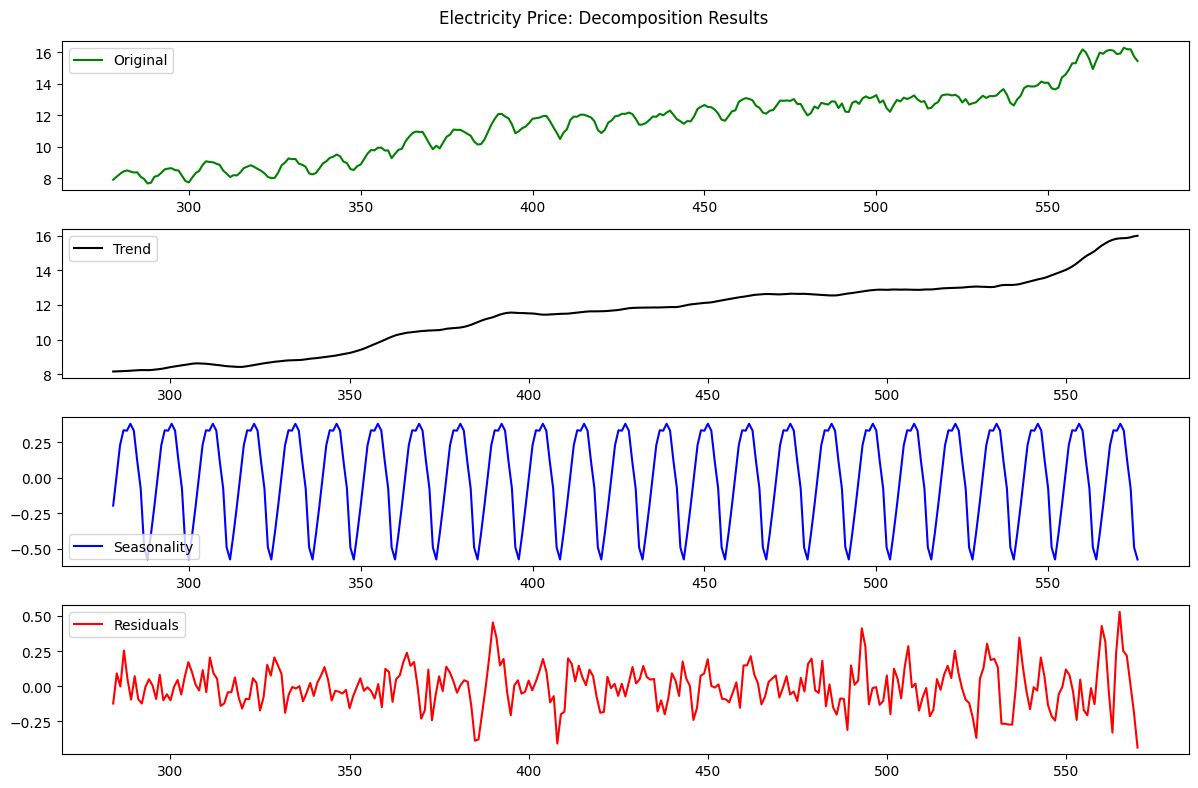

In [157]:
rt, rs, rr = decomposition(electricity['Residential'][200:], 'Electricity Price: Decomposition Results')

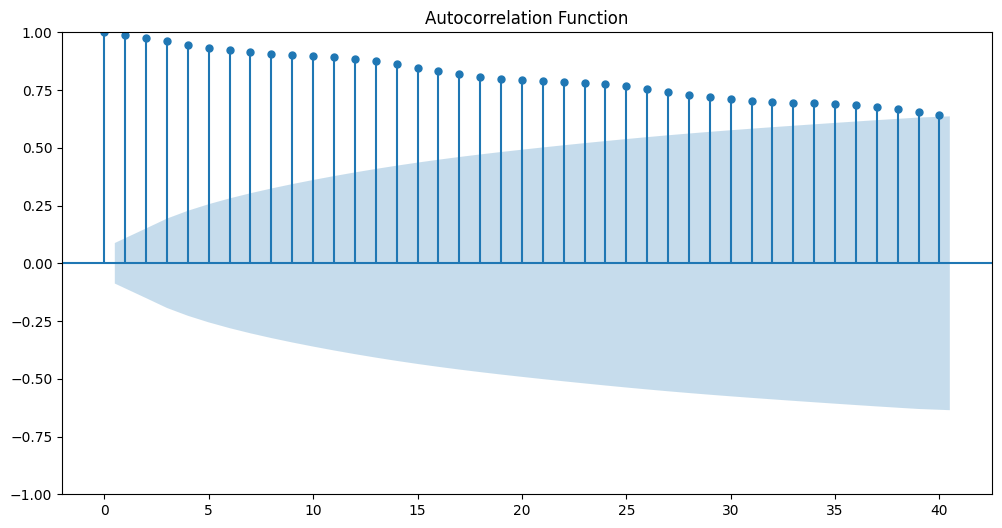

In [158]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF Plots
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(electricity['Residential'], ax=ax, lags=40)  # You can change the number of lags as needed
plt.title('Autocorrelation Function')
plt.show()

In [159]:
def residual_analysis(residual):

  import statsmodels.api as sm
  from statsmodels.stats.diagnostic import acorr_ljungbox


  # Assuming 'residual' is your residual series from the decomposition
  # residual = decomposition.resid.dropna()  # Ensure no NaNs in the series

  # Plot Residuals
  plt.figure(figsize=(12, 6))
  plt.plot(residual)
  plt.title('Residuals from Decomposition')
  plt.xlabel('Time')
  plt.ylabel('Residuals')
  plt.show()

  # Plot ACF of Residuals
  fig, ax = plt.subplots(figsize=(12, 6))
  plot_acf(residual, ax=ax, lags=40)  # Adjust lags based on your specific needs
  plt.title('ACF of Residuals')
  plt.show()

  # Perform Ljung-Box test
  lags = 10  # Adjust the number of lags as needed
  lb_results = acorr_ljungbox(residual, lags=[lags], return_df=True)  # Using return_df=True for easier handling

  # Print the results
  print("Ljung-Box Test Results:")
  print(lb_results)

  if lb_results['lb_pvalue'].iloc[0] < 0.05:
    print(f"The residuals are not random (i.e., there is autocorrelation at lag {lags}).")
  else:
      print(f"The residuals appear random (i.e., no significant autocorrelation at lag {lags}).")

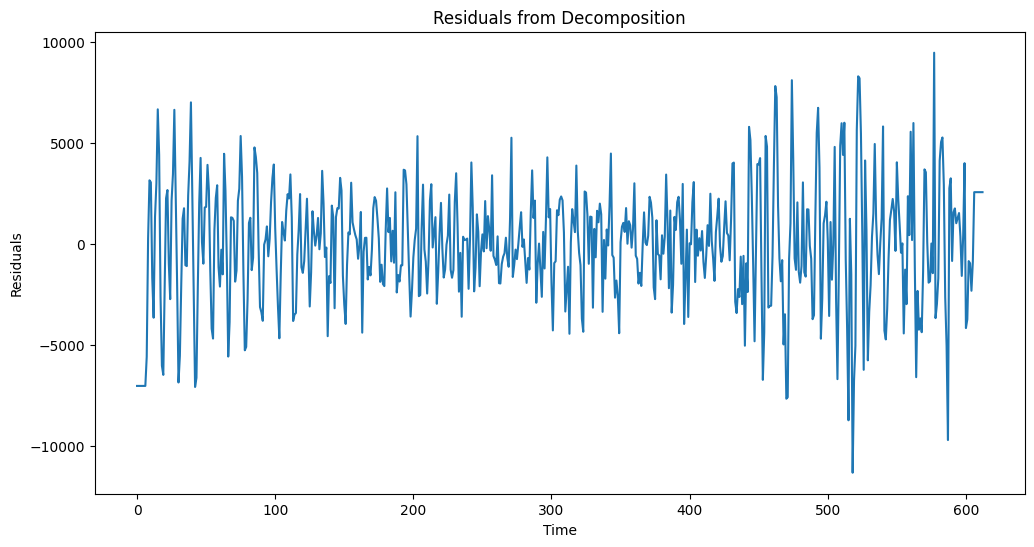

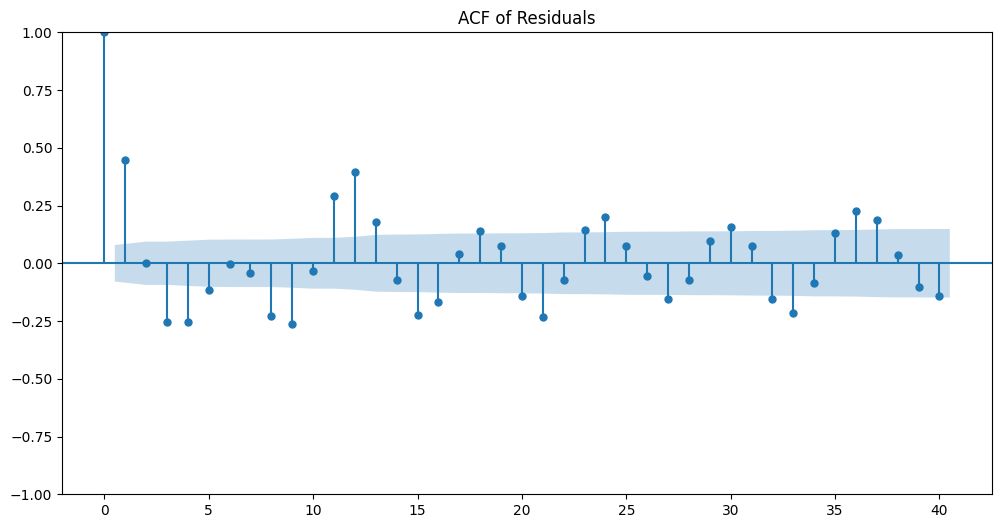

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  288.362276  4.471794e-56
The residuals are not random (i.e., there is autocorrelation at lag 10).


In [160]:
residual_analysis(cr)

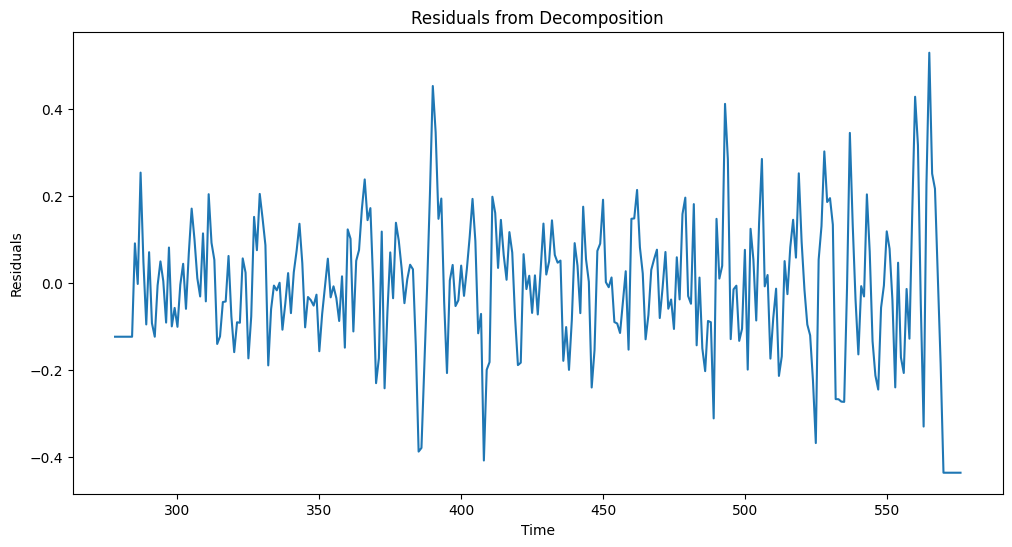

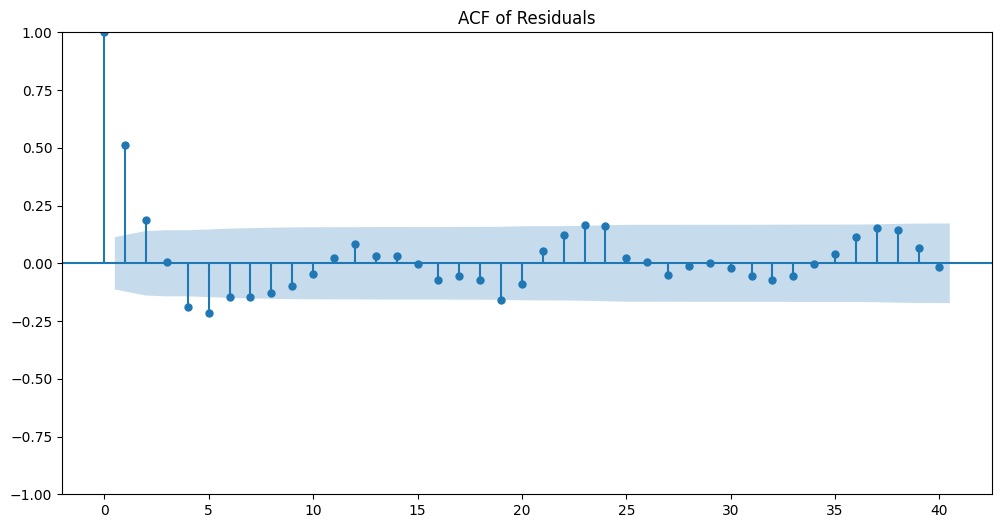

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  136.904919  1.813695e-24
The residuals are not random (i.e., there is autocorrelation at lag 10).


In [161]:
residual_analysis(rr)

## Section Analysis and Next Steps

### Overview
The time series decomposition of electricity prices provides insights into the underlying patterns such as trends, seasonality, and irregular components. This process helps in understanding the long-term movement (trend), repeating short-term cycle (seasonality), and random noise (residuals) in electricity price data.

### Decomposition Results
The decomposition was performed using an additive model where the original series is considered as a sum of the trend, seasonal, and residual components:

- **Original Series**: Shows the actual electricity prices over time.
- **Trend Component**: Represents the long-term progression of prices, highlighting any upwards or downwards movement over the period.
- **Seasonal Component**: Captures the recurring short-term cycles within the data, which could be related to factors like changes in demand due to weather or economic activities.
- **Residuals**: These are obtained by removing the trend and seasonal components from the original series, leaving behind the unexplained noise.


### Autocorrelation Analysis of Residuals
To assess the randomness of the residuals, which should ideally contain no pattern, an autocorrelation function (ACF) was plotted:

- **ACF of Residuals**: Indicates how the residuals are related with their own lagged values. Significant peaks in the ACF plot suggest that there is autocorrelation present in the residuals, implying that not all patterns were captured by the trend and seasonal components.


### Next Steps: Differencing
Given that the residuals display autocorrelation as evidenced by the ACF plot, the next step involves differencing the series. Differencing is a method used to transform a time series into a stationary series by subtracting the previous observation from the current observation. This approach helps in reducing or eliminating autocorrelation and can make the series more suitable for modeling through ARIMA or other statistical methods. By differencing the data, we aim to improve the model’s ability to forecast future prices more accurately.

The process of differencing will also be evaluated using ACF and PACF plots to ensure that the transformed data meets the assumptions of stationarity, necessary for further time series analysis and forecasting.


In [162]:
import pandas as pd

# Assuming 'series' is your time series data stored in a pandas Series or DataFrame column
pricesdiff = electricity['Residential'][200:].diff(periods=1).dropna()

In [163]:
pricesdiff

279    0.19
280    0.18
281    0.16
282    0.06
283   -0.07
       ... 
572    0.36
573   -0.09
574   -0.01
575   -0.46
576   -0.28
Name: Residential, Length: 298, dtype: float64

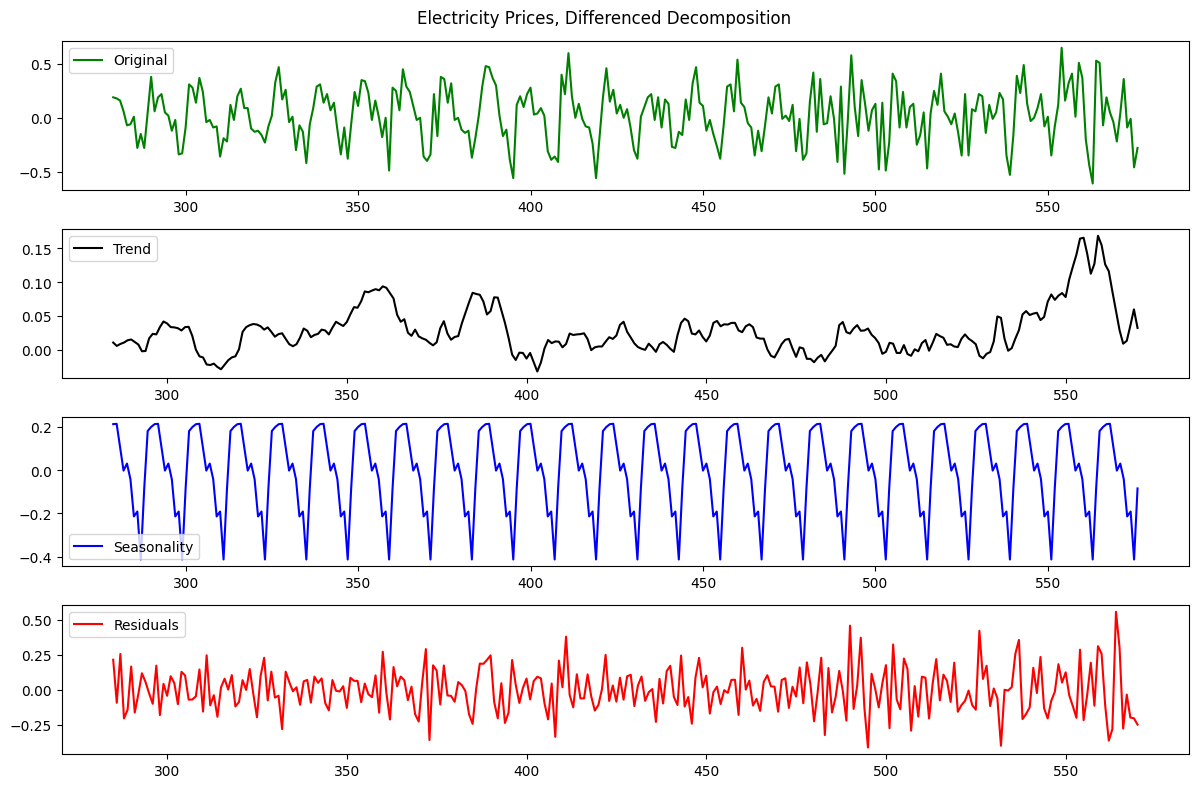

In [164]:
trend, season, resid = decomposition(pricesdiff, "Electricity Prices, Differenced Decomposition")

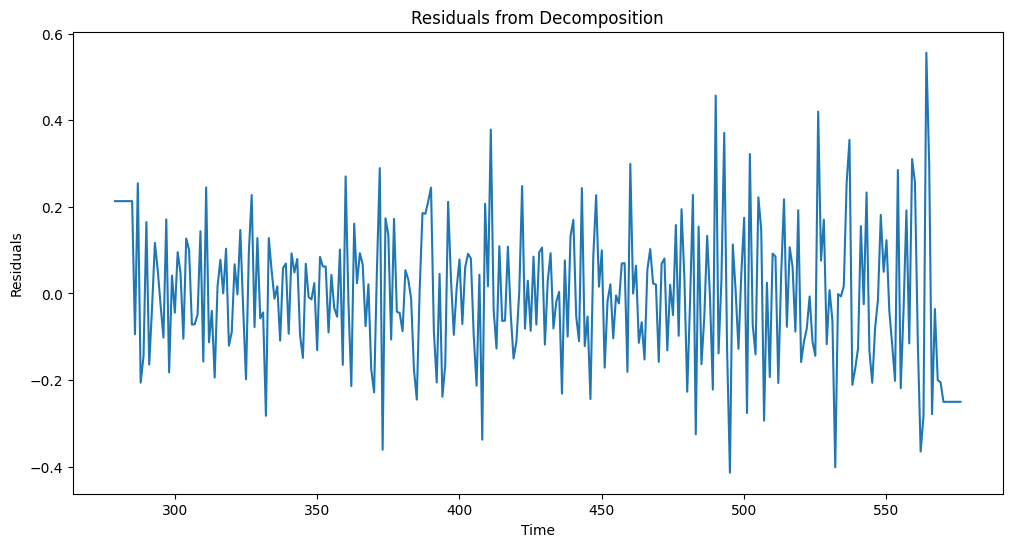

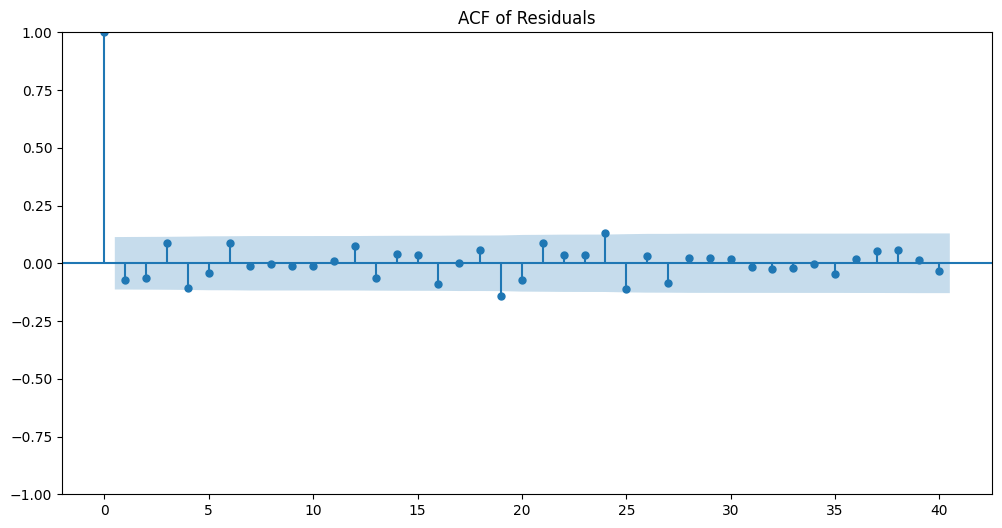

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  11.938839   0.289171
The residuals appear random (i.e., no significant autocorrelation at lag 10).


In [165]:
residual_analysis(resid)

After one difference the residuals of the differenced series appear random: the increments have been modelled successfully.

In [166]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA model with p=1, d=1, q=1
model = ARIMA(electricity['Residential'][200:-5], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


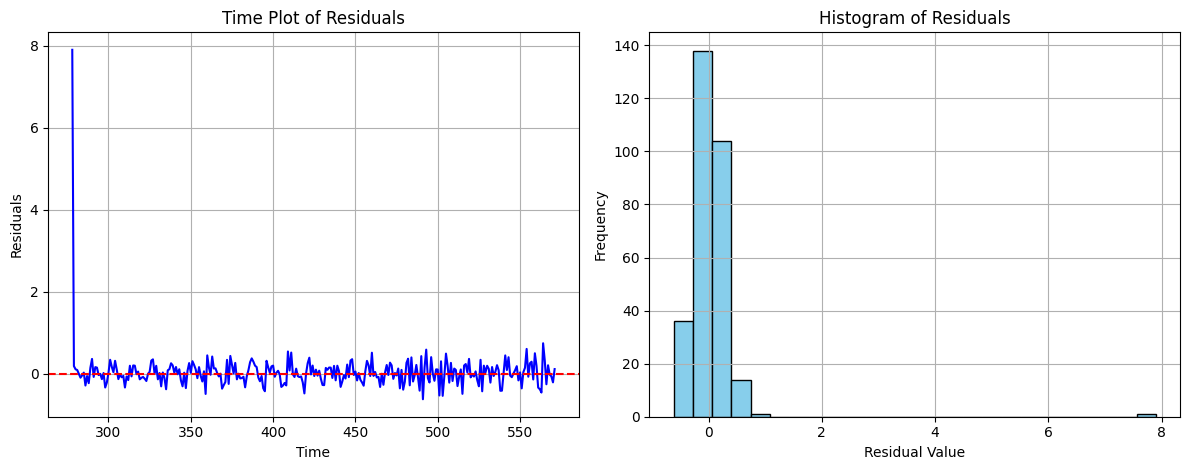

In [167]:
# Assuming residuals is a variable containing the residuals from an ARIMA model
residuals = model_fit.resid

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)

# Plot for residuals over time
ax[0].plot(residuals, color='blue')  # Use a blue line to plot the residuals
ax[0].set_title('Time Plot of Residuals')  # Adding a title to the plot
ax[0].set_xlabel('Time')  # Label for the x-axis
ax[0].set_ylabel('Residuals')  # Label for the y-axis
ax[0].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero for reference
ax[0].grid(True)  # Add gridlines for better readability

# Histogram of residuals
ax[1].hist(residuals, bins=25, color='skyblue', edgecolor='black')  # Histogram with specified color and edge color
ax[1].set_title('Histogram of Residuals')  # Adding a title to the histogram
ax[1].set_xlabel('Residual Value')  # Label for the x-axis
ax[1].set_ylabel('Frequency')  # Label for the y-axis
ax[1].grid(True)  # Add gridlines to the histogram for better readability

plt.tight_layout()  # Adjust the layout to make room for the plot labels
plt.show()  # Display the plots


In [168]:
# Forecast the next 5 steps
forecast = model_fit.forecast(steps=5)
print(forecast)

294    15.942123
295    15.946651
296    15.948343
297    15.948975
298    15.949211
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [169]:
electricity['Residential'][-5:]

572    16.29
573    16.20
574    16.19
575    15.73
576    15.45
Name: Residential, dtype: float64

In [170]:
# Calculate MSE

array1 = forecast
array2 = [16.29, 16.20, 16.19, 15.73, 15.73]

mse = np.mean((array1 - array2)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0679211356403298


In [171]:
import statsmodels.api as sm

# Assuming 'series' is your time series data
# Define the order and seasonal_order parameters
# order = (p, d, q)
# seasonal_order = (P, D, Q, s) - where 's' is the number of periods per season
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Example for monthly data with annual seasonality

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(pricesdiff[:-5],
                                  order=order,
                                  seasonal_order=seasonal_order,
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

model_fit = model.fit()

# Print the summary of the model's performance
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Residential   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  88.540
Date:                            Sat, 04 May 2024   AIC                           -167.080
Time:                                    01:47:42   BIC                           -149.162
Sample:                                         0   HQIC                          -159.882
                                            - 293                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1216      0.055     -2.192      0.028      -0.230      -0.013
ma.L1         -1.0000     11.340   

In [172]:
! pip install pmdarima

In [173]:
electricity

,Month,Residential
6,1976-07-01,3.90
7,1976-08-01,3.70
8,1976-09-01,3.80
9,1976-10-01,3.90
10,1976-11-01,3.80
...,...,...
572,2023-09-01,16.29
573,2023-10-01,16.20
574,2023-11-01,16.19
575,2023-12-01,15.73


**AR Model**

In [178]:
!pip install pmdarima
import pmdarima as pm



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20.097, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15.591, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21.176, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13.598, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16.128, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-14.159, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.192 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  299
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  10.064
Date:                Sat, 04 May 2024   AIC                            -16.128
Time:                        01:51:33   BIC                             -8.734
Sample:                             0   HQIC                           -13.168
                  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.745, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3.632, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31.331, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-33.217, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-31.920, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.201 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  279
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  18.609
Date:                Sat, 04 May 2024   AIC                            -33.217
Time:                        02:10:36   BIC                            -25.962
Sample:                             0   HQIC                           -30.307
                    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 0.8383725095659572


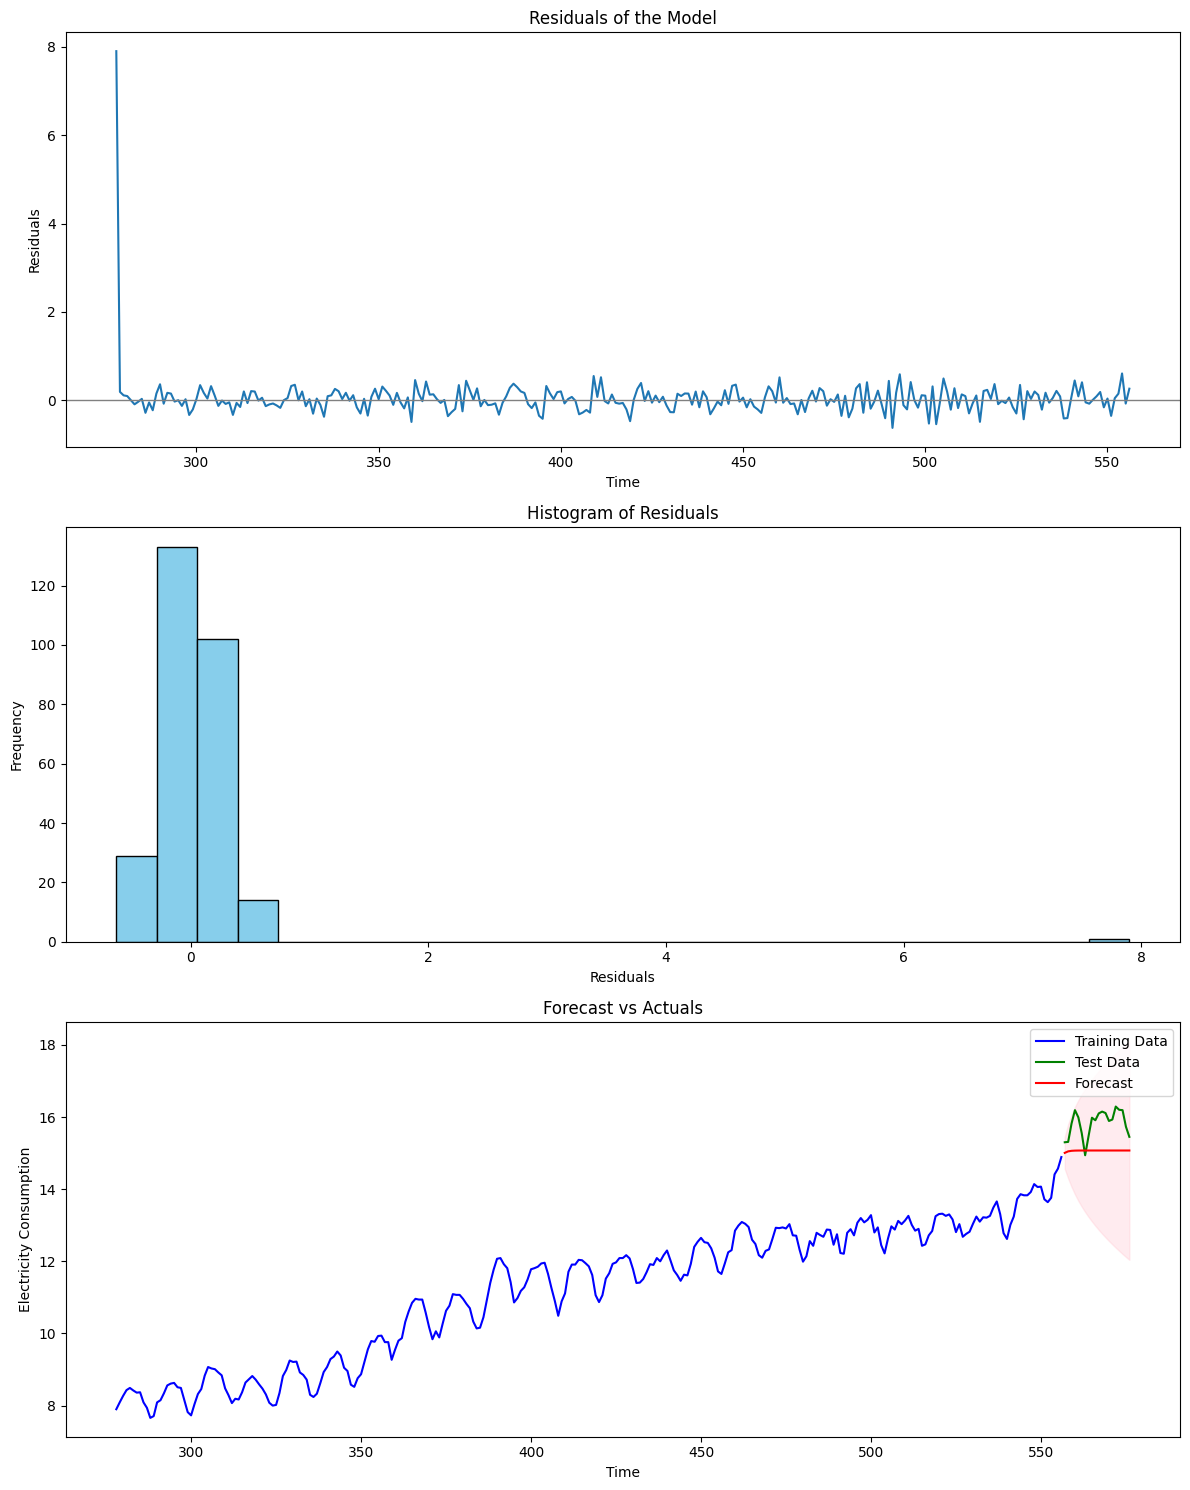

In [187]:
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'electricity' is your DataFrame and 'Residential' is your target column
data = electricity['Residential'][200:]  # Use data starting from index 200
n_forecast = 20  # Number of points to forecast

# Split data into training and testing
train, test = data[:-n_forecast], data[-n_forecast:]

# Fit an automatic AR model using auto_arima on the training data
model_AR = pm.auto_arima(train,
                         start_p=0,
                         start_q=0,
                         max_p=8,  # Test AR orders from 0 to 5
                         d=None,  # Let model determine differencing, set to 0 if data is already stationary
                         max_q=0,  # No MA component
                         seasonal=False,  # No seasonality
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)

# Print the summary of the fitted model
print(model_AR.summary())

# Forecast the next 20 points
forecast, conf_int = model_AR.predict(n_periods=n_forecast, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Get the residuals from the fitted model
residuals4 = model_AR.resid()

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot residuals
ax[0].plot(residuals4)
ax[0].set_title('Residuals of the Model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Residuals')
ax[0].axhline(0, color='grey', lw=1)  # Horizontal line at zero for reference

# Plot histogram of residuals
ax[1].hist(residuals4, bins=25, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')

# Plot the training data, test data, and forecasts
ax[2].plot(data.index[:-n_forecast], train, label='Training Data', color='blue')
ax[2].plot(data.index[-n_forecast:], test, label='Test Data', color='green')
ax[2].plot(data.index[-n_forecast:], forecast, label='Forecast', color='red')
ax[2].fill_between(data.index[-n_forecast:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax[2].set_title('Forecast vs Actuals')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Electricity Consumption')
ax[2].legend()

plt.tight_layout()
plt.show()


**MA Model**

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.632, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-26.235, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3.632, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-30.457, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-43.506, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-51.152, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-81.830, Time=0.26 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=-86.146, Time=0.34 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=-85.276, Time=0.31 sec
 ARIMA(0,1,6)(0,0,0)[0]             : AIC=-73.595, Time=0.12 sec

Best model:  ARIMA(0,1,6)(0,0,0)[0] intercept
Total fit time: 1.461 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  279
Model:               SARIMAX(0, 1, 6)   Log Likelihood                  51.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


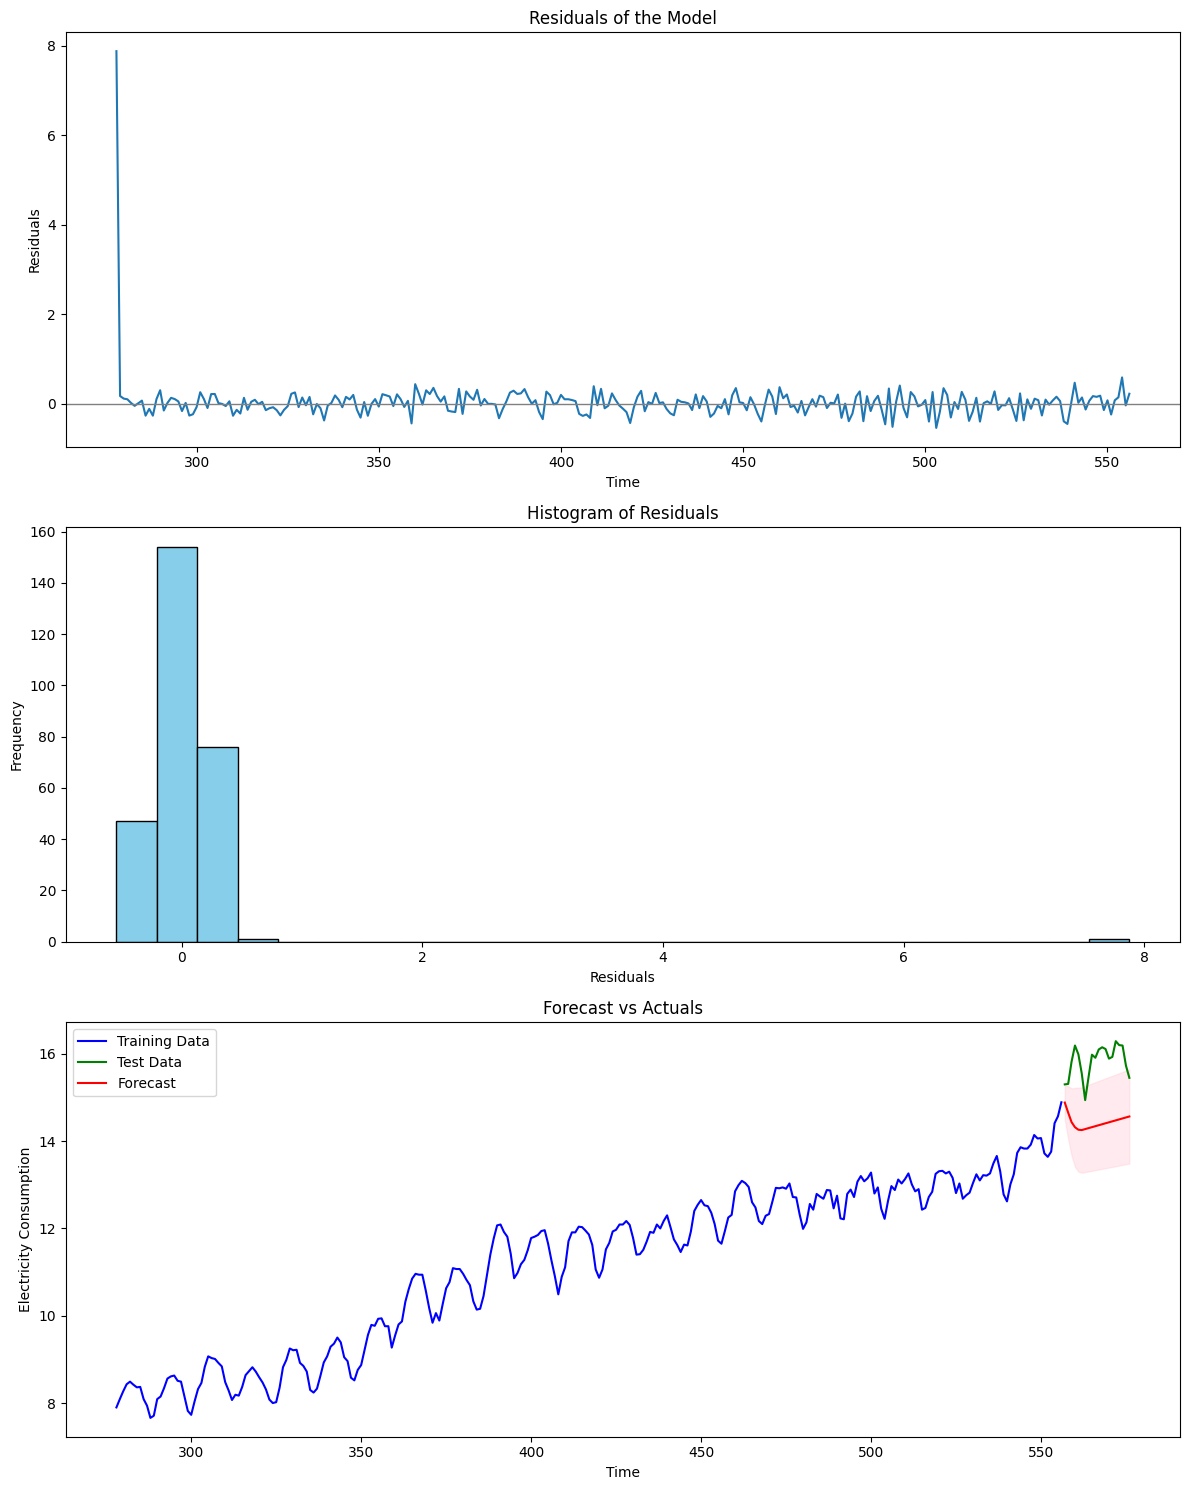

In [188]:
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'electricity' is your DataFrame and 'Residential' is your target column
data = electricity['Residential'][200:]  # Use data starting from index 200
n_forecast = 20  # Number of points to forecast

# Split data into training and testing
train, test = data[:-n_forecast], data[-n_forecast:]

# Fit an automatic AR model using auto_arima on the training data
model_AR = pm.auto_arima(train,
                         start_p=0,
                         start_q=0,
                         max_p=0,  # Test AR orders from 0 to 5
                         d=None,  # Let model determine differencing, set to 0 if data is already stationary
                         max_q=8,
                         seasonal=False,  # No seasonality
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)

# Print the summary of the fitted model
print(model_AR.summary())

# Forecast the next 20 points
forecast, conf_int = model_AR.predict(n_periods=n_forecast, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Get the residuals from the fitted model
residuals4 = model_AR.resid()

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot residuals
ax[0].plot(residuals4)
ax[0].set_title('Residuals of the Model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Residuals')
ax[0].axhline(0, color='grey', lw=1)  # Horizontal line at zero for reference

# Plot histogram of residuals
ax[1].hist(residuals4, bins=25, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')

# Plot the training data, test data, and forecasts
ax[2].plot(data.index[:-n_forecast], train, label='Training Data', color='blue')
ax[2].plot(data.index[-n_forecast:], test, label='Test Data', color='green')
ax[2].plot(data.index[-n_forecast:], forecast, label='Forecast', color='red')
ax[2].fill_between(data.index[-n_forecast:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax[2].set_title('Forecast vs Actuals')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Electricity Consumption')
ax[2].legend()

plt.tight_layout()
plt.show()


**ARMA Model**

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.745, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-26.235, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3.632, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31.331, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31.081, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-29.552, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-33.217, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-31.920, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31.626, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-26.187, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-30.142, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.651 seconds
                               SARIMAX Results                                
Dep. Variable:           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


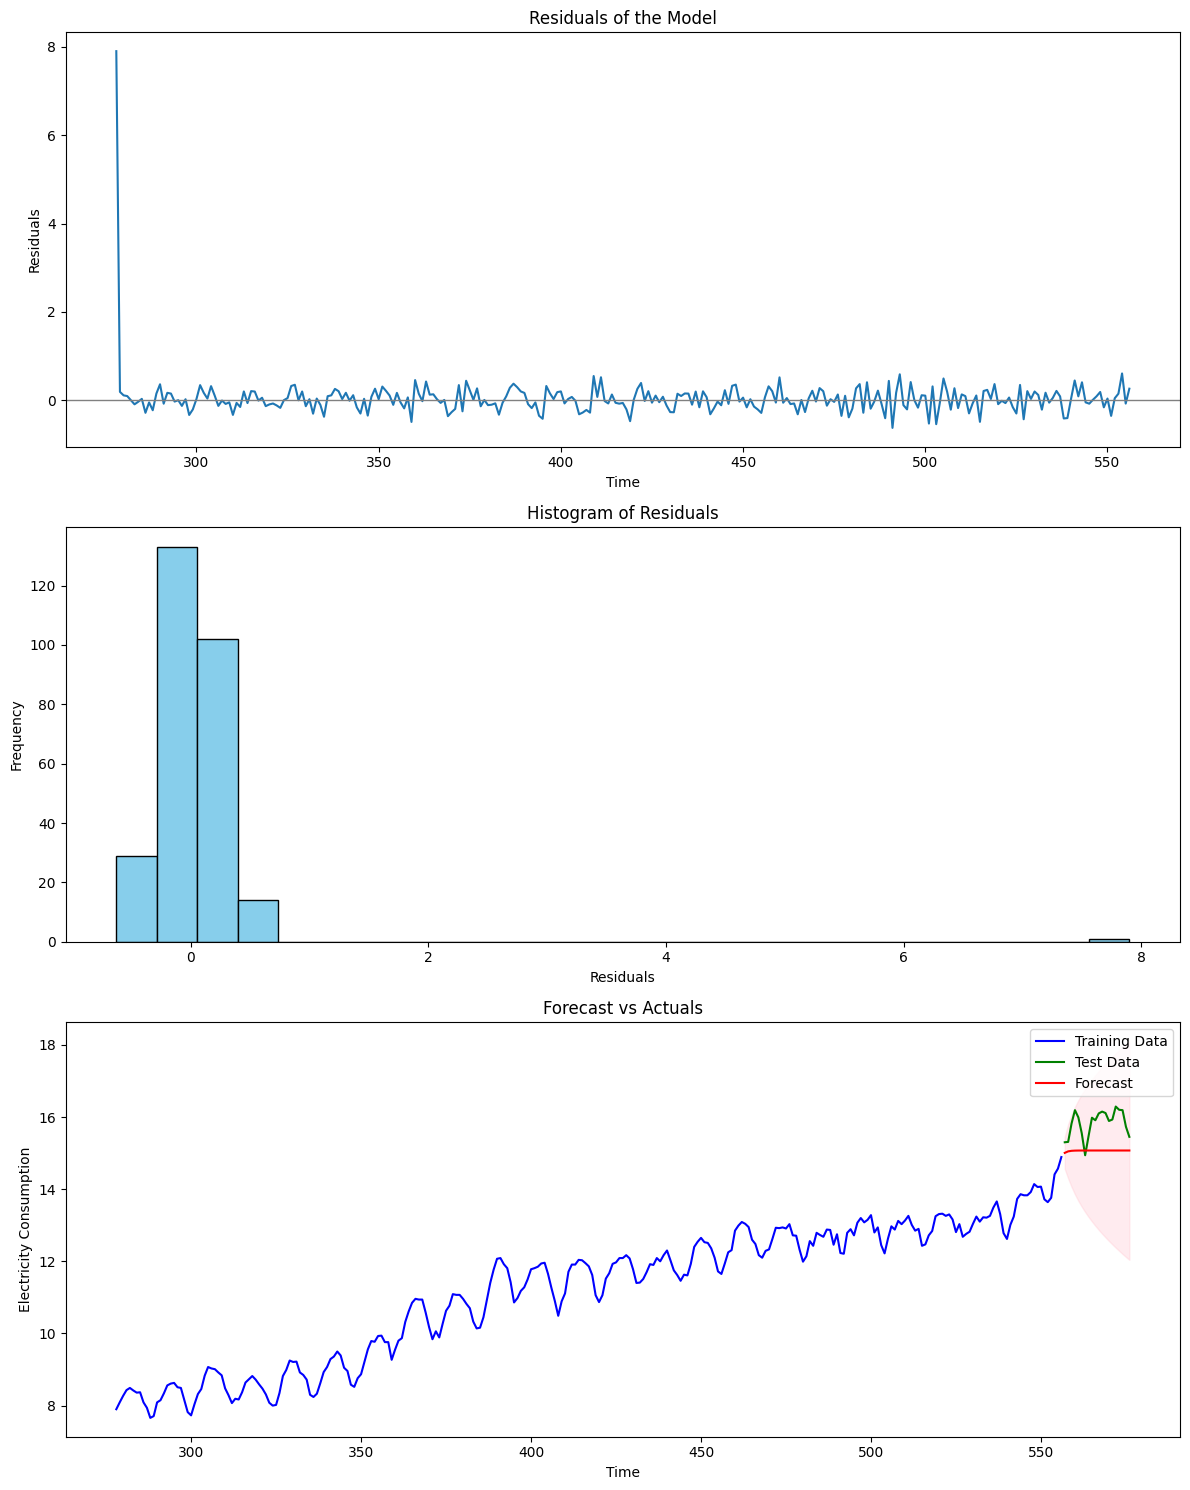

In [189]:
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'electricity' is your DataFrame and 'Residential' is your target column
data = electricity['Residential'][200:]  # Use data starting from index 200
n_forecast = 20  # Number of points to forecast

# Split data into training and testing
train, test = data[:-n_forecast], data[-n_forecast:]

# Fit an automatic AR model using auto_arima on the training data
model_AR = pm.auto_arima(train,
                         start_p=0,
                         start_q=0,
                         d=None,  # Let model determine differencing, set to 0 if data is already stationary
                         max_q=8,
                         max_p=8,
                         seasonal=False,  # No seasonality
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore',
                         trace=True)

# Print the summary of the fitted model
print(model_AR.summary())

# Forecast the next 20 points
forecast, conf_int = model_AR.predict(n_periods=n_forecast, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Get the residuals from the fitted model
residuals4 = model_AR.resid()

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot residuals
ax[0].plot(residuals4)
ax[0].set_title('Residuals of the Model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Residuals')
ax[0].axhline(0, color='grey', lw=1)  # Horizontal line at zero for reference

# Plot histogram of residuals
ax[1].hist(residuals4, bins=25, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')

# Plot the training data, test data, and forecasts
ax[2].plot(data.index[:-n_forecast], train, label='Training Data', color='blue')
ax[2].plot(data.index[-n_forecast:], test, label='Test Data', color='green')
ax[2].plot(data.index[-n_forecast:], forecast, label='Forecast', color='red')
ax[2].fill_between(data.index[-n_forecast:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax[2].set_title('Forecast vs Actuals')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Electricity Consumption')
ax[2].legend()

plt.tight_layout()
plt.show()


**ARIMA**

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.632, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.745, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-26.235, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3.632, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31.331, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31.081, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-29.552, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-33.217, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-31.920, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31.626, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-26.187, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-30.142, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.643 seconds
                               SARIMAX Results                                
Dep. Variable:           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


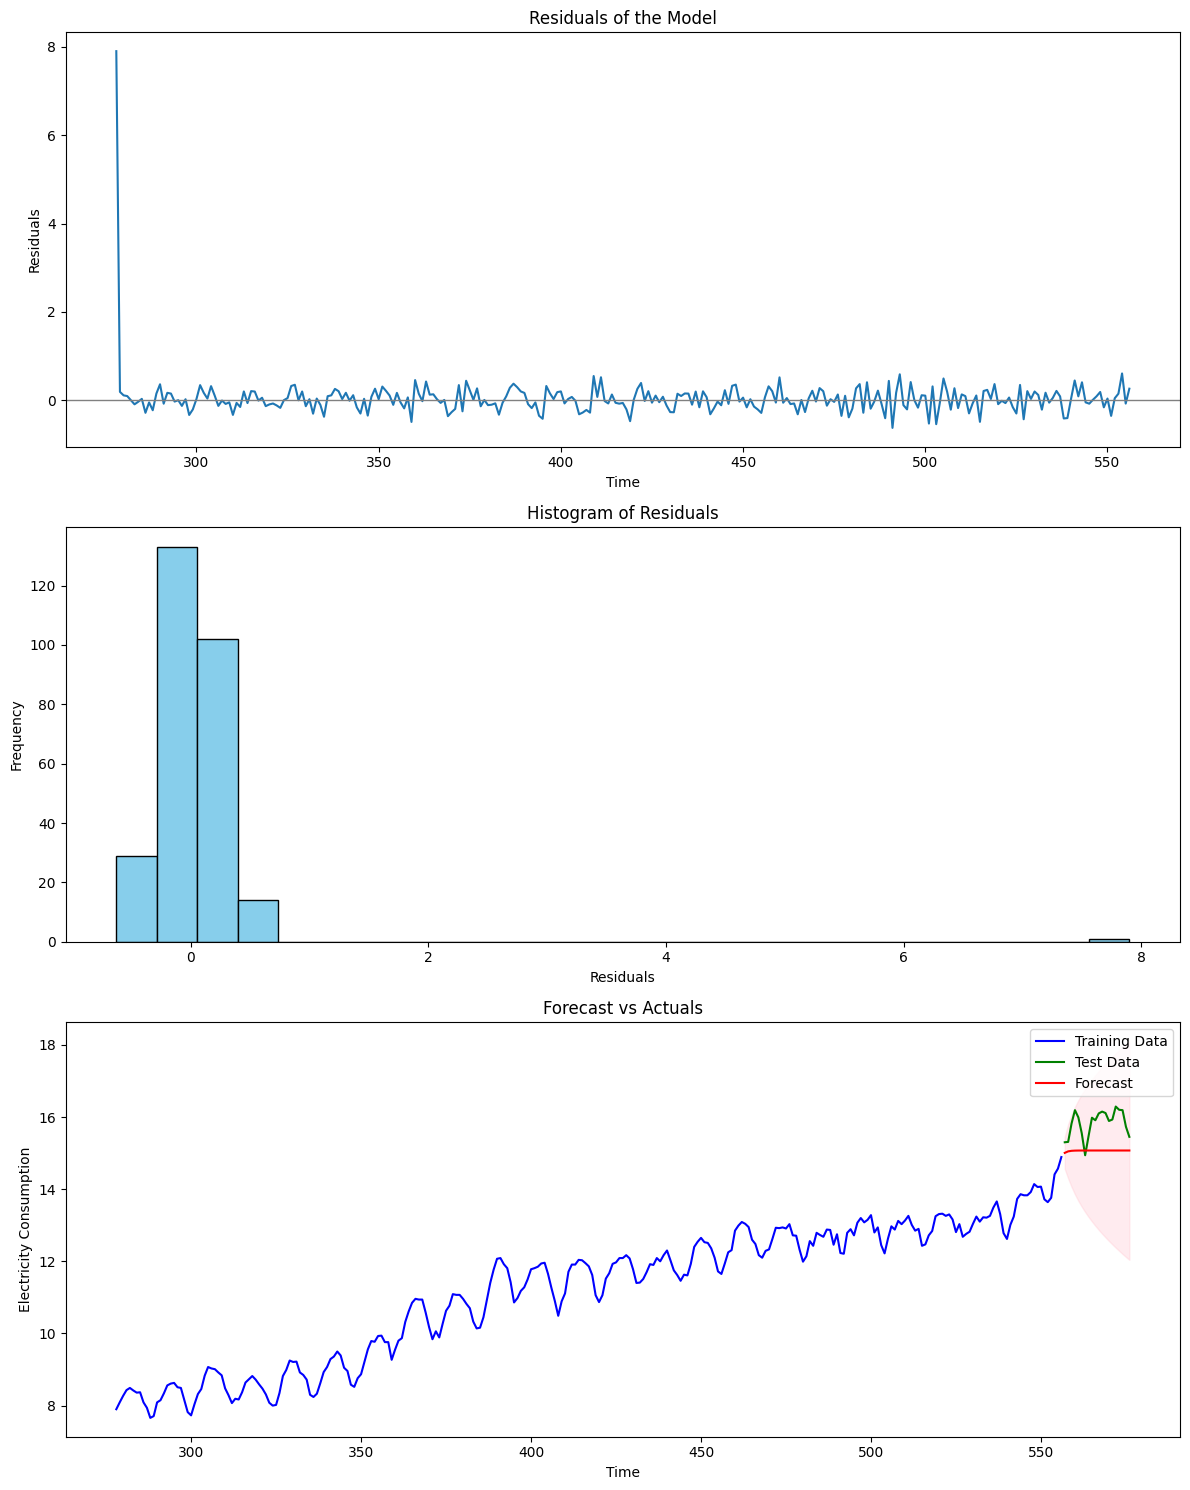

In [190]:
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'electricity' is your DataFrame and 'Residential' is your target column
data = electricity['Residential'][200:]  # Use data starting from index 200
n_forecast = 20  # Number of points to forecast

# Split data into training and testing
train, test = data[:-n_forecast], data[-n_forecast:]

# Fit an automatic ARIMA model using auto_arima on the training data
model_ARIMA = pm.auto_arima(train,
                            start_p=0,
                            start_q=0,
                            max_p=8,  # Test AR orders from 0 to 5
                            max_q=8,  # Test MA orders from 0 to 5
                            d=None,  # Let model determine differencing, set to 0 if data is already stationary
                            seasonal=False,  # No seasonality
                            stepwise=True,
                            suppress_warnings=True,
                            error_action='ignore',
                            trace=True)

# Print the summary of the fitted model
print(model_ARIMA.summary())

# Forecast the next 20 points
forecast, conf_int = model_ARIMA.predict(n_periods=n_forecast, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Get the residuals from the fitted model
residuals_ARIMA = model_ARIMA.resid()

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot residuals
ax[0].plot(residuals_ARIMA)
ax[0].set_title('Residuals of the Model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Residuals')
ax[0].axhline(0, color='grey', lw=1)  # Horizontal line at zero for reference

# Plot histogram of residuals
ax[1].hist(residuals_ARIMA, bins=25, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')

# Plot the training data, test data, and forecasts
ax[2].plot(data.index[:-n_forecast], train, label='Training Data', color='blue')
ax[2].plot(data.index[-n_forecast:], test, label='Test Data', color='green')
ax[2].plot(data.index[-n_forecast:], forecast, label='Forecast', color='red')
ax[2].fill_between(data.index[-n_forecast:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax[2].set_title('Forecast vs Actuals')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Electricity Consumption')
ax[2].legend()

plt.tight_layout()
plt.show()


**SARIMA**

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2.632, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-165.515, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-90.541, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3.632, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-32.745, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-206.259, Time=0.71 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-228.589, Time=1.19 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-229.639, Time=0.47 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-91.964, Time=0.14 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-228.389, Time=1.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=-133.856, Time=0.51 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-226.114, Time=1.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-223.314, Time=0.29 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-230.578, Time=0.70 sec
 ARIMA(2,1,0)(0,0,1)[12] int

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


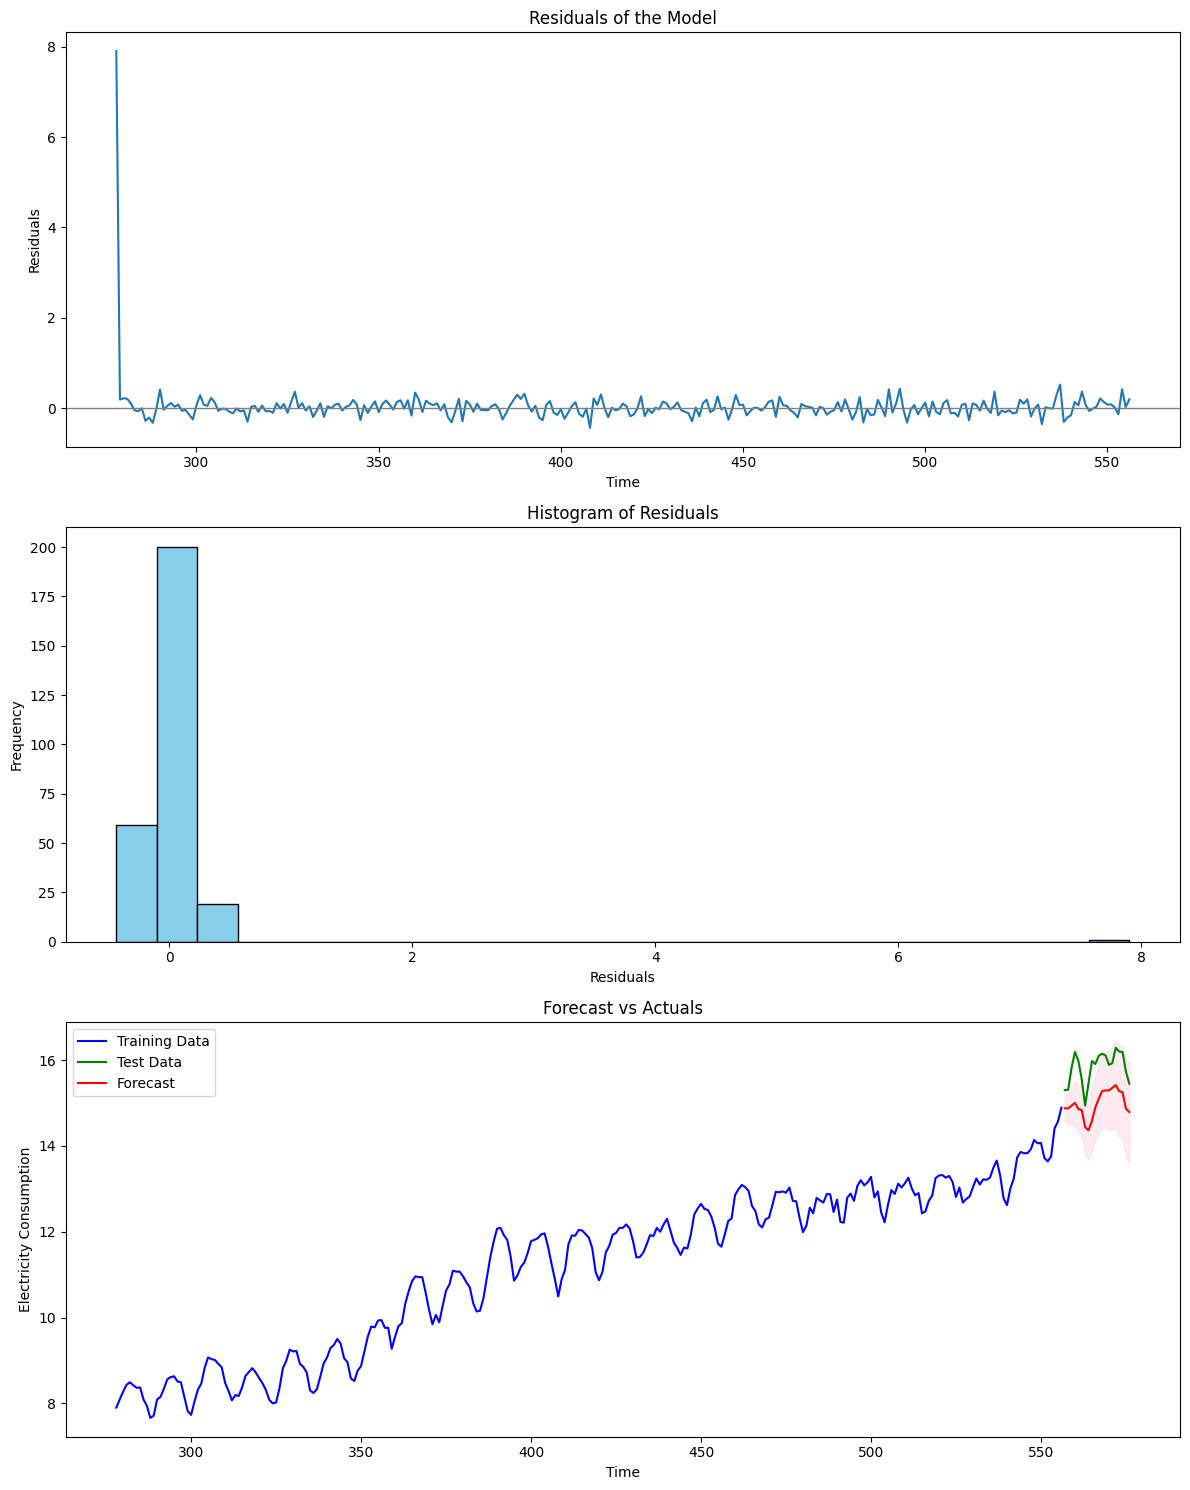

In [191]:
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'electricity' is your DataFrame and 'Residential' is your target column
data = electricity['Residential'][200:]  # Use data starting from index 200
n_forecast = 20  # Number of points to forecast

# Split data into training and testing
train, test = data[:-n_forecast], data[-n_forecast:]

# Fit an automatic SARIMA model using auto_arima on the training data
model_SARIMA = pm.auto_arima(train,
                             start_p=0,
                             start_q=0,
                             max_p=3,  # Test AR orders from 0 to 3
                             max_q=3,  # Test MA orders from 0 to 3
                             d=None,  # Let model determine differencing, set to 0 if data is already stationary
                             seasonal=True,  # Enable seasonality
                             start_P=0,
                             start_Q=0,
                             max_P=2,  # Test seasonal AR orders from 0 to 2
                             max_Q=2,  # Test seasonal MA orders from 0 to 2
                             D=None,  # Let model determine seasonal differencing
                             m=12,  # Monthly data, assuming an annual cycle
                             stepwise=True,
                             suppress_warnings=True,
                             error_action='ignore',
                             trace=True)

# Print the summary of the fitted model
print(model_SARIMA.summary())

# Forecast the next 20 points
forecast, conf_int = model_SARIMA.predict(n_periods=n_forecast, return_conf_int=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Get the residuals from the fitted model
residuals_SARIMA = model_SARIMA.resid()

# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot residuals
ax[0].plot(residuals_SARIMA)
ax[0].set_title('Residuals of the Model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Residuals')
ax[0].axhline(0, color='grey', lw=1)  # Horizontal line at zero for reference

# Plot histogram of residuals
ax[1].hist(residuals_SARIMA, bins=25, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')

# Plot the training data, test data, and forecasts
ax[2].plot(data.index[:-n_forecast], train, label='Training Data', color='blue')
ax[2].plot(data.index[-n_forecast:], test, label='Test Data', color='green')
ax[2].plot(data.index[-n_forecast:], forecast, label='Forecast', color='red')
ax[2].fill_between(data.index[-n_forecast:], conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax[2].set_title('Forecast vs Actuals')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Electricity Consumption')
ax[2].legend()

plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 4.073304297257334


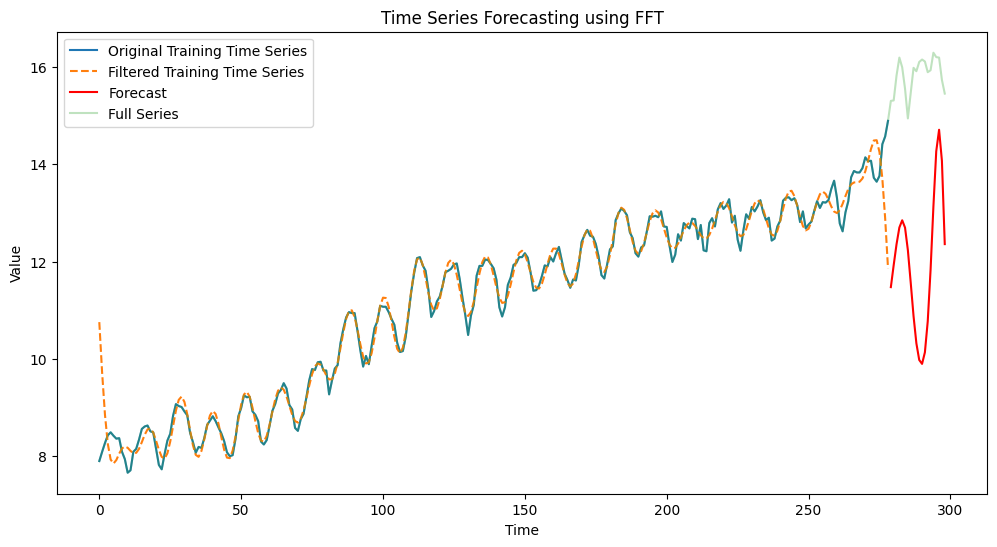

<ipython-input-210-a8139fe204ca>:49: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, np.abs(fft_result), 'b', markerfmt=" ", basefmt="-b", use_line_collection=True, label='Frequency Spectrum')


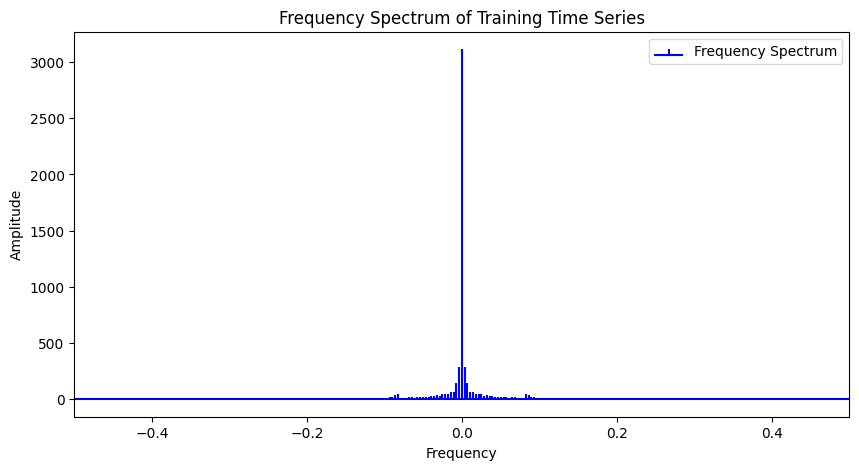

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Example data
# Assuming 'data' is your complete time series and you want to forecast the last 20 points
n_forecast = 20
data_train = data[:-n_forecast]  # Training data excludes the last 20 points
data_test = data[-n_forecast:]   # Test data (last 20 points)

t_train = np.arange(len(data_train))
t_test = np.arange(len(data_train), len(data_train) + n_forecast)

# Perform FFT on the training data
fft_result = np.fft.fft(data_train)
frequencies = np.fft.fftfreq(len(data_train), d=1)  # Assuming unit sampling rate; adjust 'd' if your sampling rate differs

# Filter out high-frequency components (noise)
cutoff_frequency = 0.1  # Adjust the cutoff frequency as needed
fft_result[np.abs(frequencies) > cutoff_frequency] = 0

# Inverse FFT to get the filtered signal
filtered_data_train = np.fft.ifft(fft_result).real

# Extend FFT result by 20 points for forecasting
extended_fft_result = np.fft.ifft(fft_result, n=len(data_train) + n_forecast).real

# Forecasting part
forecast = extended_fft_result[-n_forecast:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data_test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the original time series, filtered signal, and forecast
plt.figure(figsize=(12, 6))
plt.plot(t_train, data_train, label='Original Training Time Series')
plt.plot(t_train, filtered_data_train, label='Filtered Training Time Series', linestyle='--')
plt.plot(t_test, forecast, label='Forecast', color='red')
plt.plot(np.arange(len(data)), data, label='Full Series', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting using FFT')
plt.legend()
plt.show()

# Plotting the frequency spectrum
plt.figure(figsize=(10, 5))
plt.stem(frequencies, np.abs(fft_result), 'b', markerfmt=" ", basefmt="-b", use_line_collection=True, label='Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Training Time Series')
plt.legend()
plt.xlim(-0.5, 0.5)  # Limit x-axis to show relevant frequencies, adjust as necessary
plt.show()

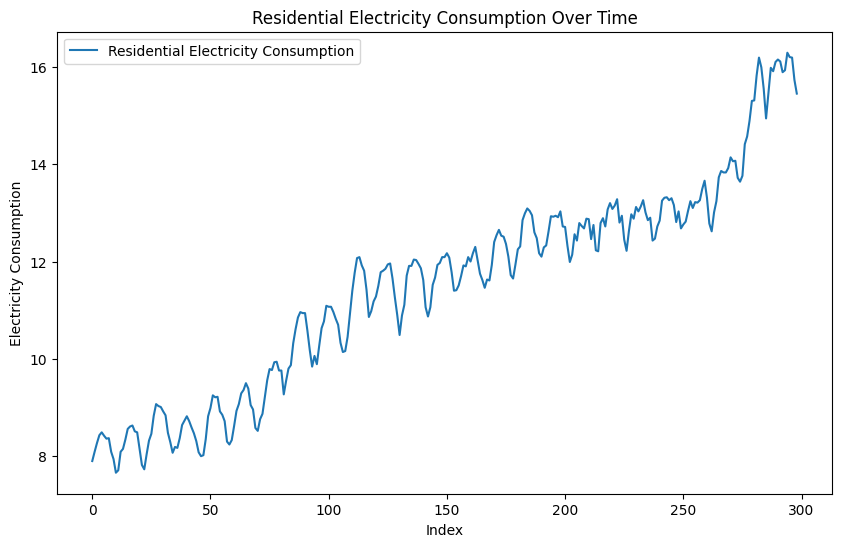

In [211]:
import matplotlib.pyplot as plt

# Assuming 'electricity' is already loaded with 'Residential' as one of its columns
datatotal = electricity['Residential']

# Resetting the index so it's purely numerical and starts from 0
datatotal_reset = datatotal[200:].reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(datatotal_reset, label='Residential Electricity Consumption')
plt.title('Residential Electricity Consumption Over Time')
plt.xlabel('Index')  # Adjust to indicate it's now a simple numerical index
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()
